<a href="https://colab.research.google.com/github/Snowy1013z/entertainment_streaming_content/blob/main/Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By: Shreya, Sahiti Reddy, Anh Tuyet To, Eli Young

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive')

# Confirm that the files are accessible
# os.listdir()
folder_path = "./Streaming Assignment/ReelGood Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data1 = pd.read_csv(folder_path + "/Reel Good Data (Title+Service+Genre+Tag List).csv")
data1.head()

<ipython-input-27-29ddb4f948f6>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(folder_path + "/Reel Good Data (Title+Service+Genre+Tag List).csv")


,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287834 entries, 0 to 287833
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             287834 non-null  int64  
 1   Title                  287834 non-null  object 
 2   URL                    287834 non-null  object 
 3   Type                   287834 non-null  object 
 4   Service                287834 non-null  object 
 5   Genre                  287834 non-null  object 
 6   Tag                    287834 non-null  object 
 7   IMDB                   283312 non-null  float64
 8   ReelGood               286904 non-null  float64
 9   AgeRating              166197 non-null  object 
 10  Rated                  97564 non-null   object 
 11  Released Year          287834 non-null  int64  
 12  Duration Year          23071 non-null   object 
 13  Seasons                23047 non-null   float64
 14  What it's about        148046 non-nu

## Classify each platform

In [ ]:
data1['Service'] = data1['Service'].replace('watchdisney', 'disney_plus')

In [ ]:
import pandas as pd


def classify(platform):
    name = platform.lower()

    if 'tveverywhere' in name or '_tve' in name or '_go' in name or 'watch_' in name or '_everywhere' in name:
        return 'TV Everywhere (Cable Auth Required)'
    elif 'free' in name or 'pluto' in name or 'imdb' in name or 'tubi' in name or 'crackle' in name or 'popcornflix' in name or 'plex' in name or 'viewster' in name:
        return 'Free Ad-Supported (AVOD)'
    elif 'plus' in name or 'premium' in name or 'prime' in name or 'apple_tv' in name or name in ['netflix', 'hulu_plus', 'disney_plus', 'philo', 'fubo_tv', 'curiositystream', 'sundancenow', 'britbox', 'shudder', 'epix', 'hallmark_movies_now', 'acrntv', 'cine', 'criterion_channel', 'mubi']:
        return 'Subscription-Based (SVOD)'
    elif name in ['abc', 'nbc', 'fox', 'pbs', 'cbs', 'thecw', 'comedy', 'tbs', 'amc', 'mtv', 'vh1', 'syfy', 'natgeo']:
        return 'Broadcast Network Apps'
    else:
        return 'Unclassified'

# Classify each platform
# df = pd.DataFrame(tsgt, columns=['Service'])
data1['Category'] = data1['Service'].apply(classify)

In [ ]:
data1['Category'].value_counts(normalize=True)

,proportion
Category,
Free Ad-Supported (AVOD),0.387032
Unclassified,0.338852
Subscription-Based (SVOD),0.251871
TV Everywhere (Cable Auth Required),0.016162
Broadcast Network Apps,0.006083


# Distribution of Subscription-Based (SVOD)

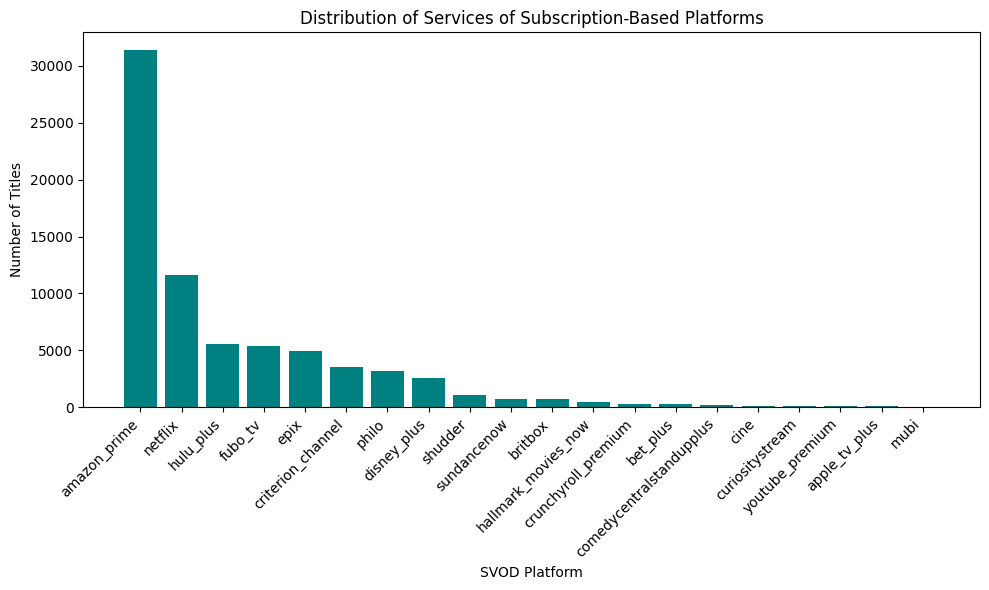

In [ ]:
import matplotlib.pyplot as plt

# Focusing only on 'Subscription-Based (SVOD)'
svod_data = data1[data1['Category'] == 'Subscription-Based (SVOD)']
svod_counts = svod_data['Service'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(svod_counts.index, svod_counts.values, color='#008080')  # Teal color
plt.xlabel('SVOD Platform')
plt.ylabel('Number of Titles')
plt.title('Distribution of Services of Subscription-Based Platforms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Our research shows that Netflix, Amazon Prime, Disney+, Hulu Plus, Peacock, HBO Max, Apple TV+, and YouTube Premium are platforms represent the core of the paid streaming ecosystem and consistently rank among the top SVOD services in US.

In [ ]:
svod = svod_data[svod_data['Service'].isin(['netflix', 'amazon_prime', 'disney_plus','hulu_plus', 'peacock','hbo_max','apple_tv_plus','youtube_premium'])]


<ipython-input-34-2e769fd6914c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=svod, palette=custom_palette)


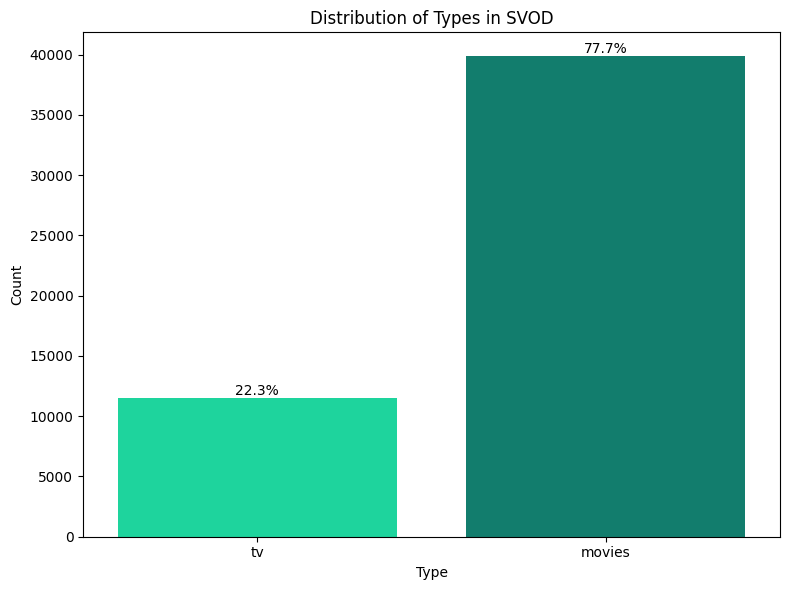

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')  # Optional: gives a clean white background

# Define safe custom palette (no white)
custom_palette = ['#00f2a9', '#008f79']  # teal and darker teal

plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=svod, palette=custom_palette)

plt.title('Distribution of Types in SVOD')
plt.xlabel('Type')
plt.ylabel('Count')

# Add percentages on top of bars
total = len(svod['Type'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), color='black', ha='center', va='bottom')

#plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   IMDB   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     130.6
Date:                Wed, 07 May 2025   Prob (F-statistic):           3.65e-30
Time:                        04:50:55   Log-Likelihood:                -33437.
No. Observations:               22908   AIC:                         6.688e+04
Df Residuals:                   22906   BIC:                         6.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1321      0.009    819.462      0.0

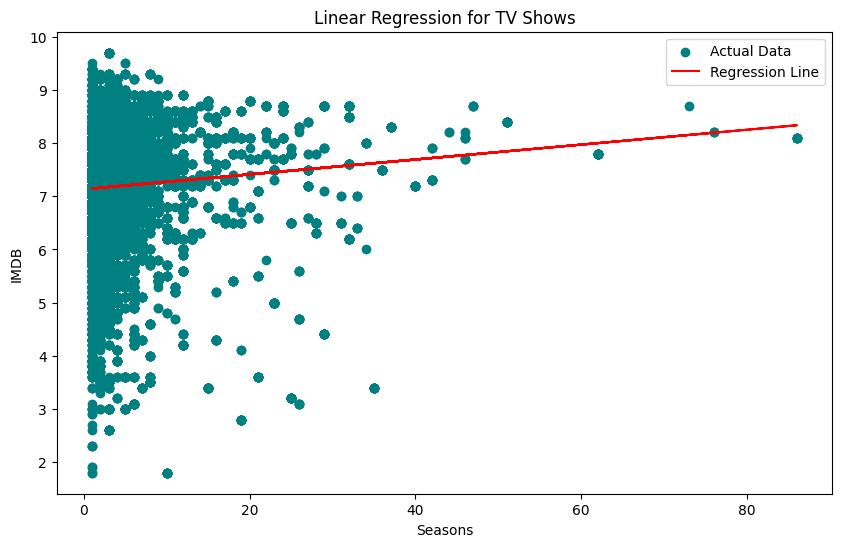

In [ ]:
# Filter for 'tv' type
tv_data = data1[data1['Type'] == 'tv']

# Define the dependent and independent variables
dependent_variable ='IMDB'
independent_variable = 'Seasons'

# Create the linear regression model
model = smf.ols(formula=f'{dependent_variable} ~ {independent_variable}', data=tv_data).fit()

# Print the model summary
print(model.summary())

# Make predictions
predictions = model.predict(tv_data[[independent_variable]])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(tv_data[independent_variable], tv_data[dependent_variable],color='teal', label='Actual Data')
plt.plot(tv_data[independent_variable], predictions, color='red', label='Regression Line')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Linear Regression for TV Shows')
plt.legend()
plt.show()

**All data**

The OLS regression indicates a statistically significant positive relationship between the number of seasons and IMDB ratings. The coefficient for Seasons is 0.014 (p < 0.001), suggesting that each additional season is associated with a 0.014-point increase in IMDB rating. Although this result is highly significant, the model's explanatory power remains very low (R-squared = 0.006), meaning that the number of seasons accounts for less than 1% of the variation in ratings. Thus, while the relationship exists, it is weak and likely influenced by other factors not included in the model.

                            OLS Regression Results                            
Dep. Variable:                   IMDB   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     24.88
Date:                Wed, 07 May 2025   Prob (F-statistic):           6.24e-07
Time:                        04:50:55   Log-Likelihood:                -11741.
No. Observations:                7890   AIC:                         2.349e+04
Df Residuals:                    7888   BIC:                         2.350e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1909      0.015    473.656      0.0

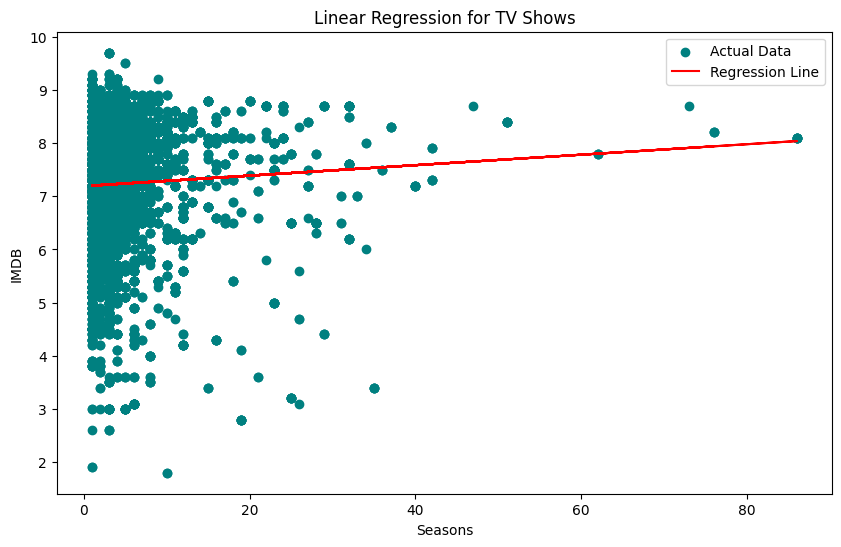

In [ ]:
# Filter for 'tv' type
tv_data = svod_data[svod_data['Type'] == 'tv']

# Define the dependent and independent variables
dependent_variable ='IMDB'
independent_variable = 'Seasons'

# Create the linear regression model
model = smf.ols(formula=f'{dependent_variable} ~ {independent_variable}', data=tv_data).fit()

# Print the model summary
print(model.summary())

# Make predictions
predictions = model.predict(tv_data[[independent_variable]])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(tv_data[independent_variable], tv_data[dependent_variable],color='teal', label='Actual Data')
plt.plot(tv_data[independent_variable], predictions, color='red', label='Regression Line')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Linear Regression for TV Shows')
plt.legend()
plt.show()

**SVOD**

The OLS regression results show a statistically significant but very weak relationship between the number of seasons and IMDB ratings for TV shows. The coefficient for Seasons is 0.005 (p = 0.036), indicating that each additional season is associated with a minimal 0.005-point increase in IMDB rating. However, the model explains virtually none of the variance (R-squared = 0.001), suggesting that the number of seasons alone is not a strong predictor of IMDB scores. Despite statistical significance, the practical impact is negligible.